In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

# PRE-PROCESSING

## Upload data

In [2]:
pd.set_option('display.max_columns',40)

In [3]:
data = pd.read_csv(r'interest_prediction_bank.csv')
data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_interested
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


## Describe all columns

In [4]:
data.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_interested
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,NNVBBKZB,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


## Look categorical and numerical columns

In [5]:
cat = (data.dtypes == 'object')
categorical_cols = list(cat[cat].index)

categorical_cols

['ID',
 'Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [6]:
num = (data.dtypes == 'int64')
numerical_cols = list(num[num].index)

numerical_cols

['Age', 'Vintage', 'Avg_Account_Balance', 'Is_interested']

In [7]:
for i in data[['ID','Region_Code']]:
    data.drop(i,axis=1,inplace=True)

## Look if there is missing value

In [8]:
data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_interested              0
dtype: int64

## Fill missing values

In [9]:
data['Credit_Product'] = data['Credit_Product'].fillna(value=data['Credit_Product'].mode()[0])

In [10]:
data.isnull().sum()

Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_interested          0
dtype: int64

## Look correlation

In [11]:
corr = data.corr()['Is_interested']

high_corr_feats = corr[abs(corr) > 0.01].index.tolist()

high_corr_feats

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_866/3473541402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['Is_interested']


['Age', 'Vintage', 'Avg_Account_Balance', 'Is_interested']

In [12]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_interested'],
      dtype='object')

## Use variance_infilation_factor to measure multicollinearity beetwen the independent variables

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Age',
                  'Vintage', 
                  'Avg_Account_Balance']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,6.386088,Age
1,5.027854,Vintage
2,2.598217,Avg_Account_Balance


## Find out if there is Outlier

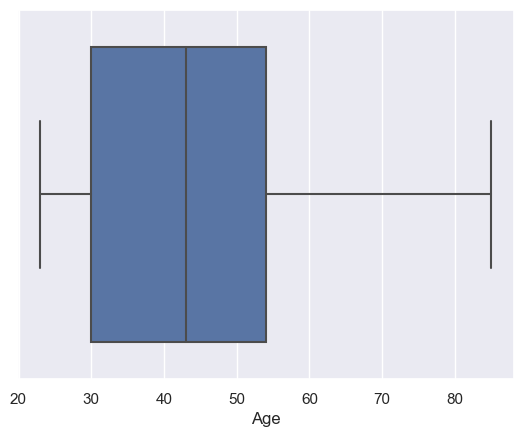

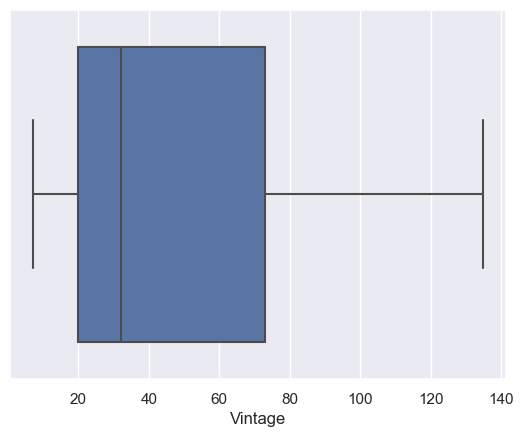

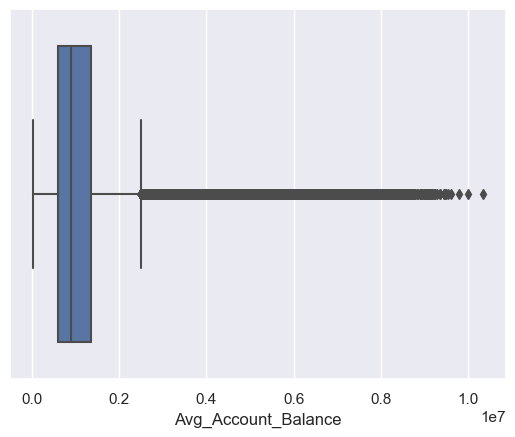

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data[['Age', 'Vintage', 'Avg_Account_Balance']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## Outlier treatment

In [15]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_866/3326136409.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_866/3326136409.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


In [16]:
for i in data[['Avg_Account_Balance']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

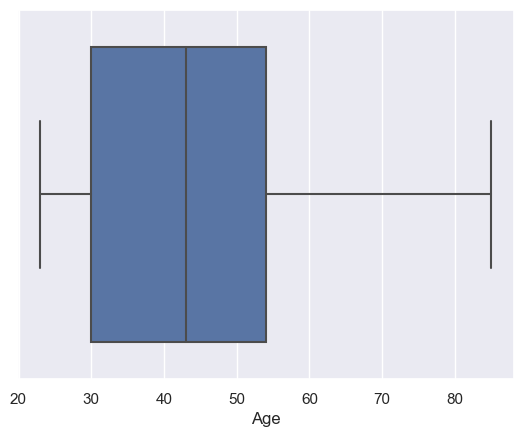

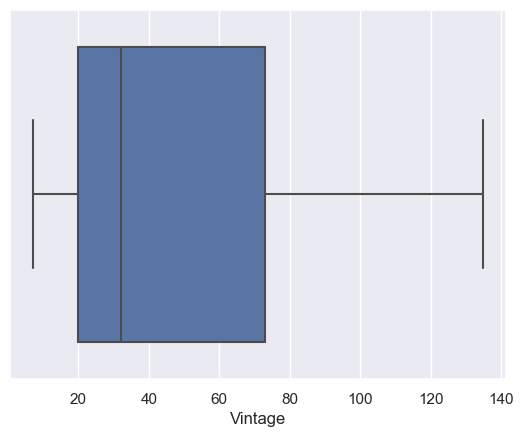

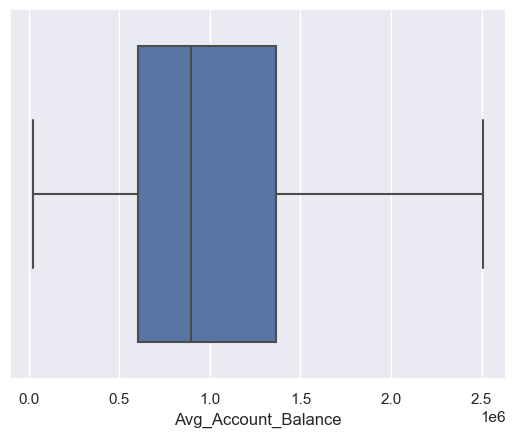

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data[['Age', 'Vintage', 'Avg_Account_Balance']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## Look missing values after outlier treatment

In [18]:
data.isnull().sum()

Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_interested          0
dtype: int64

## Look categorical columns

In [19]:
cat = (data.dtypes == 'object')
categorical_cols = list(cat[cat].index)

categorical_cols

['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

# MODELLING

## First we are going to built Catboost model with categorical data include

## Inputs and output

In [20]:
inputs = data[['Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active']]

output = data['Is_interested']

## Train test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

## Create function to measure Gini

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)

## Fit our model

In [24]:
from catboost import CatBoostClassifier

In [25]:
catboost_model = CatBoostClassifier(cat_features=['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'])
catboost_model.fit(X_train, y_train)

Learning rate set to 0.092792
0:	learn: 0.6452158	total: 99.6ms	remaining: 1m 39s
1:	learn: 0.6065295	total: 134ms	remaining: 1m 7s
2:	learn: 0.5763167	total: 169ms	remaining: 56.1s
3:	learn: 0.5533461	total: 201ms	remaining: 50.1s
4:	learn: 0.5339143	total: 238ms	remaining: 47.4s
5:	learn: 0.5191304	total: 271ms	remaining: 44.9s
6:	learn: 0.5079551	total: 304ms	remaining: 43.1s
7:	learn: 0.4979250	total: 338ms	remaining: 42s
8:	learn: 0.4904594	total: 372ms	remaining: 41s
9:	learn: 0.4845386	total: 405ms	remaining: 40.1s
10:	learn: 0.4781202	total: 440ms	remaining: 39.5s
11:	learn: 0.4731004	total: 472ms	remaining: 38.8s
12:	learn: 0.4688025	total: 504ms	remaining: 38.2s
13:	learn: 0.4646638	total: 536ms	remaining: 37.8s
14:	learn: 0.4612874	total: 570ms	remaining: 37.4s
15:	learn: 0.4591113	total: 598ms	remaining: 36.8s
16:	learn: 0.4570181	total: 630ms	remaining: 36.4s
17:	learn: 0.4552301	total: 662ms	remaining: 36.1s
18:	learn: 0.4538224	total: 696ms	remaining: 35.9s
19:	learn: 0.

## Look our model's performance

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_catboost = evaluate(catboost_model, X_test, y_test)

Model Performance
Gini prob is 57.250115120634646
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     56260
           1       0.65      0.28      0.39     17458

    accuracy                           0.79     73718
   macro avg       0.73      0.62      0.63     73718
weighted avg       0.77      0.79      0.76     73718

[[53567  2693]
 [12528  4930]]


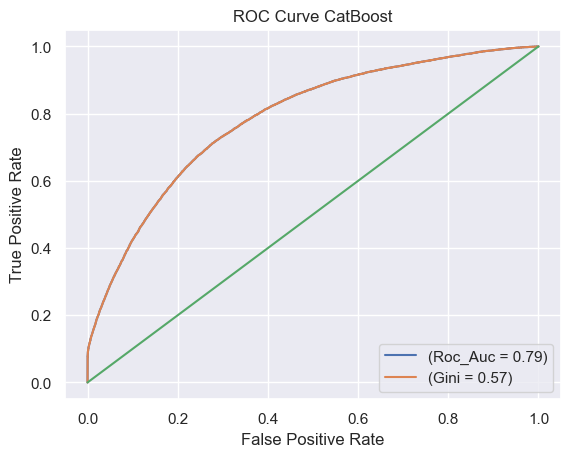

In [27]:
y_prob = catboost_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

## Now we are going to transform categorical columns to numerical using dumies method:

In [28]:
pre_data = data.copy()
pre_data.describe(include='all')

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_interested
count,245725,245725.000000,245725,245725,245725.000000,245725,2.457250e+05,245725,245725.000000
unique,2,NaN,4,4,NaN,2,NaN,2,NaN
top,Male,NaN,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,134197,NaN,100886,103718,NaN,173682,NaN,150290,NaN
mean,NaN,43.856307,NaN,NaN,46.959141,NaN,1.060996e+06,NaN,0.237208
std,NaN,14.828672,NaN,NaN,32.353136,NaN,6.072687e+05,NaN,0.425372
min,NaN,23.000000,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,30.000000,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,43.000000,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,54.000000,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [29]:
pre_data = pd.get_dummies(pre_data, drop_first=True)
pre_data

,Age,Vintage,Avg_Account_Balance,Is_interested,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,73,43,1045696.0,0,0,1,0,0,0,1,0,0,0
1,30,32,581988.0,0,0,0,1,0,0,0,0,0,0
2,56,26,1484315.0,0,0,0,0,1,0,1,0,0,1
3,34,19,470454.0,0,1,0,1,0,0,0,0,0,0
4,30,33,886787.0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,109,1925586.0,0,1,0,0,1,0,1,0,0,0
245721,27,15,862952.0,0,1,0,1,0,0,0,0,0,1
245722,26,13,670659.0,0,0,0,1,0,0,0,0,0,0
245723,28,31,407504.0,0,0,0,1,0,0,0,0,0,0


In [30]:
pre_data.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_interested', 'Gender_Male',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_Yes', 'Is_Active_Yes'],
      dtype='object')

## We are going to built Catboost model again but this time there is not a categorical columns in the data

## Inputs and output

In [31]:
inputs = pre_data.drop('Is_interested', axis=1)
output = pre_data['Is_interested']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [33]:
catboost_model_clean = CatBoostClassifier()
catboost_model_clean.fit(X_train, y_train)

Learning rate set to 0.092792
0:	learn: 0.6431526	total: 13.5ms	remaining: 13.4s
1:	learn: 0.6064499	total: 25.2ms	remaining: 12.6s
2:	learn: 0.5749351	total: 36.4ms	remaining: 12.1s
3:	learn: 0.5514657	total: 48.2ms	remaining: 12s
4:	learn: 0.5329728	total: 60.1ms	remaining: 12s
5:	learn: 0.5172904	total: 71.9ms	remaining: 11.9s
6:	learn: 0.5067326	total: 82.4ms	remaining: 11.7s
7:	learn: 0.4963628	total: 93.8ms	remaining: 11.6s
8:	learn: 0.4883231	total: 106ms	remaining: 11.6s
9:	learn: 0.4817134	total: 116ms	remaining: 11.5s
10:	learn: 0.4769176	total: 127ms	remaining: 11.5s
11:	learn: 0.4718455	total: 138ms	remaining: 11.4s
12:	learn: 0.4683968	total: 148ms	remaining: 11.3s
13:	learn: 0.4658757	total: 159ms	remaining: 11.2s
14:	learn: 0.4628729	total: 169ms	remaining: 11.1s
15:	learn: 0.4607255	total: 179ms	remaining: 11s
16:	learn: 0.4585703	total: 190ms	remaining: 11s
17:	learn: 0.4569318	total: 200ms	remaining: 10.9s
18:	learn: 0.4553474	total: 213ms	remaining: 11s
19:	learn: 0.

In [34]:
result_catboost = evaluate(catboost_model_clean, X_test, y_test)

Model Performance
Gini prob is 56.966898607544316
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     56260
           1       0.64      0.28      0.39     17458

    accuracy                           0.79     73718
   macro avg       0.73      0.62      0.63     73718
weighted avg       0.77      0.79      0.76     73718

[[53569  2691]
 [12572  4886]]


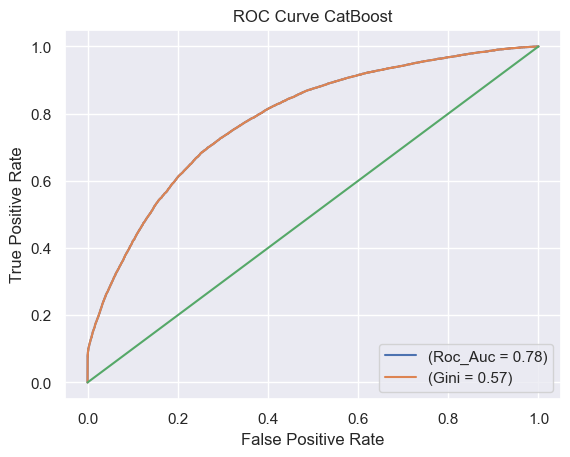

In [35]:
y_prob = catboost_model_clean.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

## Now we are going to use another model XGBM

## Fit our model

In [36]:
from xgboost import XGBClassifier 

In [37]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result = evaluate(xgb_model, X_test, y_test)

Model Performance
Gini prob is 56.53079319675025
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     56260
           1       0.65      0.27      0.38     17458

    accuracy                           0.79     73718
   macro avg       0.73      0.61      0.63     73718
weighted avg       0.77      0.79      0.76     73718

[[53675  2585]
 [12716  4742]]


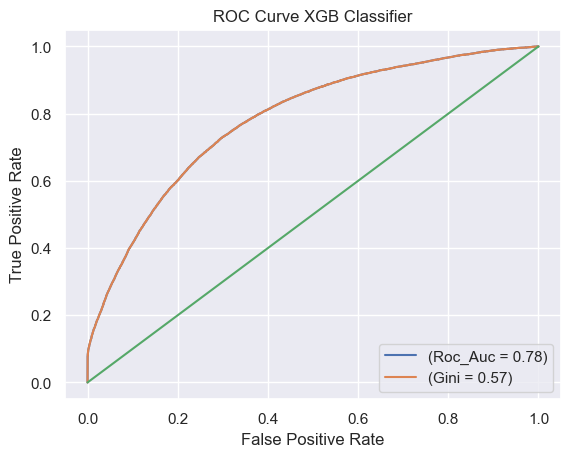

In [39]:
y_prob = xgb_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier')

plt.legend(loc='lower right')
plt.show()

# Catboost and XCBM models with Hyperparametrs

In [40]:
from sklearn.model_selection import RandomizedSearchCV

## Optimized_Catboost_model

In [41]:
param_distributions = {
    'iterations': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7)}

In [43]:
random_search_catboost = RandomizedSearchCV(catboost_model_clean,
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_catboost.fit(X_train, y_train)

0:	learn: 0.6562168	total: 95.7ms	remaining: 862ms
1:	learn: 0.6256687	total: 108ms	remaining: 433ms
2:	learn: 0.6010200	total: 145ms	remaining: 338ms
3:	learn: 0.5799495	total: 183ms	remaining: 274ms
4:	learn: 0.5620759	total: 206ms	remaining: 206ms
5:	learn: 0.5467915	total: 235ms	remaining: 157ms
6:	learn: 0.5332548	total: 262ms	remaining: 112ms
7:	learn: 0.5221408	total: 291ms	remaining: 72.8ms
8:	learn: 0.5122784	total: 320ms	remaining: 35.5ms
9:	learn: 0.5038485	total: 349ms	remaining: 0us
0:	learn: 0.6892448	total: 19.4ms	remaining: 1.92s
1:	learn: 0.6854089	total: 36.7ms	remaining: 1.8s
2:	learn: 0.6817577	total: 61.9ms	remaining: 2s
3:	learn: 0.6780731	total: 87.9ms	remaining: 2.11s
4:	learn: 0.6744922	total: 114ms	remaining: 2.17s
5:	learn: 0.6709749	total: 142ms	remaining: 2.23s
6:	learn: 0.6674959	total: 167ms	remaining: 2.21s
7:	learn: 0.6641047	total: 191ms	remaining: 2.2s
8:	learn: 0.6608134	total: 214ms	remaining: 2.17s
9:	learn: 0.6575342	total: 235ms	remaining: 2.12s


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x13bb7dab0>,
                   n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [46]:
optimized_model_catboost = random_search_catboost.best_estimator_
optmized_accuracy_catboost = evaluate(optimized_model_catboost, X_test, y_test)

Model Performance
Gini prob is 57.30579117371406
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     56260
           1       0.66      0.27      0.38     17458

    accuracy                           0.79     73718
   macro avg       0.73      0.61      0.63     73718
weighted avg       0.77      0.79      0.76     73718

[[53798  2462]
 [12749  4709]]


## Optimized_XCB

In [47]:
param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'subsample': np.linspace(0.5, 1, num=6), 
    'colsample_bytree': np.linspace(0.5, 1, num=6), 
    'gamma': [0, 1, 5], 
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5]}

In [50]:
random_search_xgb = RandomizedSearchCV(xgb_model,
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42)

In [51]:
print("Best Hyperparameters for XGB: ", random_search_xgb.best_params_)

Best Hyperparameters for XGB:  {'subsample': 0.5, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.9}


In [52]:
optimized_model_xgb = random_search_xgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_model_xgb, X_test, y_test)

Model Performance
Gini prob is 57.22928293864342
              precision    recall  f1-score   support

           0       0.80      0.96      0.88     56260
           1       0.67      0.24      0.36     17458

    accuracy                           0.79     73718
   macro avg       0.74      0.60      0.62     73718
weighted avg       0.77      0.79      0.75     73718

[[54171  2089]
 [13195  4263]]


# STACKING MODEL

## The concept behind it is simple: Multiple machine learning models are combined to obtain a more accurate model

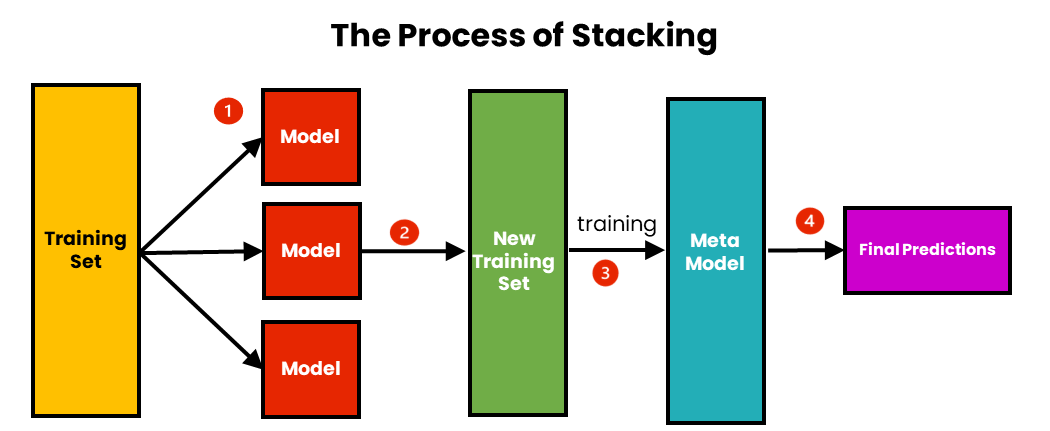

In [53]:
from mlxtend.classifier import StackingCVClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

## First we choose base models

In [54]:
base_classifiers = [
    RandomForestClassifier(),
    XGBClassifier(),
    LogisticRegression()
]

## And meta model

In [55]:
meta_classifier = CatBoostClassifier()

## Fit our model

In [60]:
stacking_model = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [61]:
stacking_model.fit(X_train, y_train)

Fitting 3 classifiers...
Fitting classifier1: randomforestclassifier (1/3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   50.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: xgbclassifier (2/3)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: logisticregression (3/3)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


Learning rate set to 0.092792
0:	learn: 0.6413260	total: 13.2ms	remaining: 13.2s
1:	learn: 0.6013742	total: 25ms	remaining: 12.5s
2:	learn: 0.5696559	total: 36.2ms	remaining: 12s
3:	learn: 0.5437979	total: 48.5ms	remaining: 12.1s
4:	learn: 0.5241261	total: 60.1ms	remaining: 12s
5:	learn: 0.5089944	total: 73.1ms	remaining: 12.1s
6:	learn: 0.4968560	total: 84.1ms	remaining: 11.9s
7:	learn: 0.4863906	total: 96ms	remaining: 11.9s
8:	learn: 0.4781212	total: 109ms	remaining: 12s
9:	learn: 0.4723550	total: 121ms	remaining: 12s
10:	learn: 0.4662321	total: 132ms	remaining: 11.9s
11:	learn: 0.4621980	total: 143ms	remaining: 11.8s
12:	learn: 0.4584649	total: 155ms	remaining: 11.8s
13:	learn: 0.4559402	total: 166ms	remaining: 11.7s
14:	learn: 0.4536186	total: 179ms	remaining: 11.7s
15:	learn: 0.4518704	total: 191ms	remaining: 11.8s
16:	learn: 0.4500973	total: 203ms	remaining: 11.8s
17:	learn: 0.4488457	total: 216ms	remaining: 11.8s
18:	learn: 0.4478438	total: 232ms	remaining: 12s
19:	learn: 0.4468

StackingCVClassifier(classifiers=[RandomForestClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_const...
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=100, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...),
                                  LogisticRegression()],
                     cv=5,
                     meta_classifier=<catboost.core.CatBoostClassifier object at 0x14f00cfa0>,
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

## Look performance 

In [62]:
result = evaluate(stacking_model, X_test, y_test)

Model Performance
Gini prob is 56.48733304453566
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     56260
           1       0.64      0.27      0.38     17458

    accuracy                           0.79     73718
   macro avg       0.72      0.61      0.63     73718
weighted avg       0.77      0.79      0.76     73718

[[53597  2663]
 [12706  4752]]


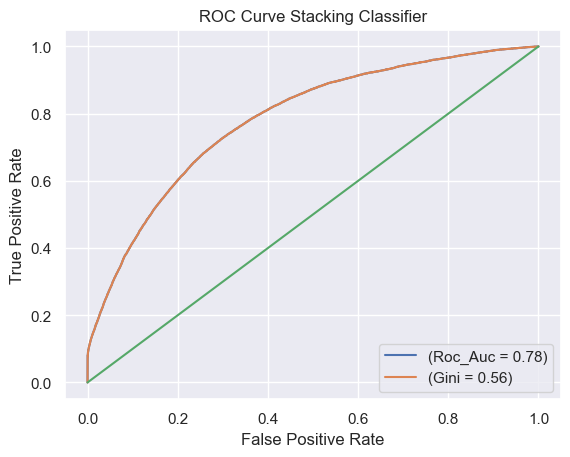

In [63]:
y_prob = stacking_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()

# Deployment

## Catboost_model has better Gini than others, hense we are going to deployed this model on test-data

In [64]:
test_data = pd.read_csv(r'interest_prediction_bank_test_set.csv')
test_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [65]:
data

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_interested
0,Female,73,Other,X3,43,No,1045696.0,No,0
1,Female,30,Salaried,X1,32,No,581988.0,No,0
2,Female,56,Self_Employed,X3,26,No,1484315.0,Yes,0
3,Male,34,Salaried,X1,19,No,470454.0,No,0
4,Female,30,Salaried,X1,33,No,886787.0,No,0
...,...,...,...,...,...,...,...,...,...
245720,Male,51,Self_Employed,X3,109,No,1925586.0,No,0
245721,Male,27,Salaried,X1,15,No,862952.0,Yes,0
245722,Female,26,Salaried,X1,13,No,670659.0,No,0
245723,Female,28,Salaried,X1,31,No,407504.0,No,0


In [66]:
test_data = test_data.drop(['Region_Code'],axis=1)
test_data

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,Other,X3,93,No,737178,Yes


In [67]:
test_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [68]:
test_data['Credit_Product'] = test_data['Credit_Product'].fillna(value=test_data['Credit_Product'].mode()[0])

In [69]:
test_data.isnull().sum()

ID                     0
Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [70]:
prob = catboost_model.predict_proba(test_data.iloc[:,1:])[:,1]

In [71]:
test_data['Pre_Interest'] = prob
test_data

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Pre_Interest
0,VBENBARO,Male,29,Other,X1,25,Yes,742366,No,0.057586
1,CCMEWNKY,Male,43,Other,X2,49,No,925537,No,0.238074
2,VK3KGA9M,Male,31,Salaried,X1,14,No,215949,No,0.066493
3,TT8RPZVC,Male,29,Other,X1,33,No,868070,No,0.029886
4,SHQZEYTZ,Female,29,Other,X1,19,No,657087,No,0.029501
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,Salaried,X2,86,Yes,4242558,Yes,0.989040
105308,CWQ72DWS,Male,55,Other,X2,86,Yes,1159153,No,0.554187
105309,HDESC8GU,Male,35,Salaried,X4,15,No,1703727,No,0.538004
105310,2PW4SFCA,Male,53,Other,X3,93,No,737178,Yes,0.576864
